In [61]:
#from StarterPy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# weather_api_key = "65ea7f29379aeac203417e0de8c0745b"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "WeatherPy/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [62]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [65]:
# weather_api_key

In [66]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [67]:
#Match OWM data to CitiPy data

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
 
count = 1


print(f"Beginning Data Retrieval")
print(f"-------------------------------")


for city in cities:  
    
    # Try statement to append value where there's a match since OWM and CitiPy won't match perfectly
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_count = response["name"]
        print(f"Processing Record {count} | {city_count}")
        
        count = count + 1
        
        # Can only pull 60rpm from OWM
        time.sleep(1.01)
        
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Bridgton
Processing Record 2 | Qaanaaq
Processing Record 3 | Ishigaki
Processing Record 4 | Kapaa
Processing Record 5 | Itoman
Processing Record 6 | Svetlogorsk
Processing Record 7 | Ilulissat
Processing Record 8 | Albany
Processing Record 9 | Puerto Ayora
Processing Record 10 | Khasan
Processing Record 11 | Busselton
Processing Record 12 | Kenda
Processing Record 13 | Broome
Processing Record 14 | Carnarvon
Processing Record 15 | Hithadhoo
Processing Record 16 | Mataura
Processing Record 17 | Diego de Almagro
Processing Record 18 | Pozo Colorado
Processing Record 19 | Jamestown
Processing Record 20 | Yellowknife
Processing Record 21 | Yulara
Processing Record 22 | Thompson
Processing Record 23 | Plouzane
Processing Record 24 | Caravelas
City not found. Skipping...
Processing Record 25 | Hobart
Processing Record 26 | Road Town
Processing Record 27 | Bredasdorp
Processing Record 28 | Bafq
Processing Record 29

In [68]:
#Build datafram from data 

weather_py = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}



weather_data_df = pd.DataFrame(weather_py)
weather_data_df.count()

City          533
Cloudiness    533
Country       533
Date          533
Humidity      533
Lat           533
Lng           533
Max Temp      533
Wind Speed    533
dtype: int64

In [69]:
weather_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bridgton,90,US,1578203306,86,44.05,-70.71,34.00,8.05
1,Qaanaaq,0,GL,1578203308,51,77.48,-69.36,-39.08,5.97
2,Ishigaki,40,JP,1578203309,69,24.34,124.16,77.00,9.17
3,Kapaa,90,US,1578203077,88,22.08,-159.32,75.20,20.80
4,Itoman,75,JP,1578203312,56,26.12,127.67,69.80,8.05
...,...,...,...,...,...,...,...,...,...
528,Talnakh,90,RU,1578203922,84,69.49,88.39,8.60,35.79
529,Kochubey,100,RU,1578203923,86,44.39,46.54,41.14,12.93
530,Cururupu,100,BR,1578203925,98,-1.82,-44.87,73.00,1.68
531,Yatou,40,CM,1578203926,94,3.63,9.81,77.00,1.12


In [70]:
weather_data_df.to_csv (r'C:\Homework\python-api-challenge\WeatherPy\cities.csv', index = None, header=True)

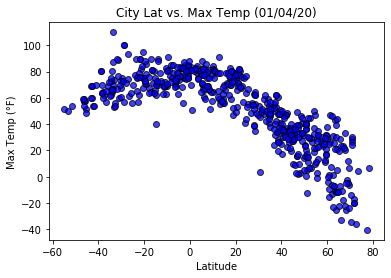

In [71]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Lat vs. Max Temp (01/04/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (°F)");

plt.savefig("Output_Images/City Lat vs. Max Temp.png")

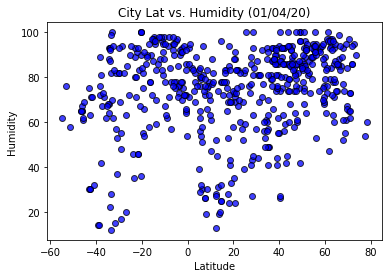

In [72]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Lat vs. Humidity (01/04/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity");

plt.savefig("Output_Images/City Lat vs. Humidity.png")

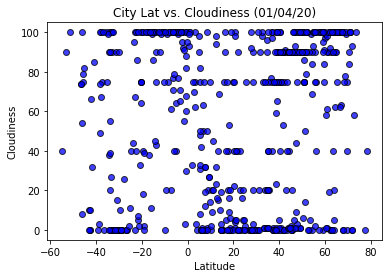

In [73]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Lat vs. Cloudiness (01/04/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness");

plt.savefig("Output_Images/City Lat vs. Cloudiness.png")

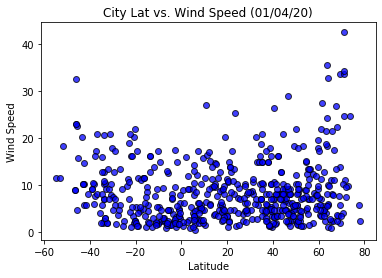

In [74]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Lat vs. Wind Speed (01/04/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed");

plt.savefig("Output_Images/City Lat vs. Wind Speed.png")